# Exoplanet Characterization - High Level Overview
Sample notebook for GSoC ML4Sci Project


In [ ]:
# Step 1: Imports & Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

print("Torch version:", torch.__version__)
print("TensorFlow version:", tf.__version__)

Torch version: 2.6.0+cu124
TensorFlow version: 2.18.0


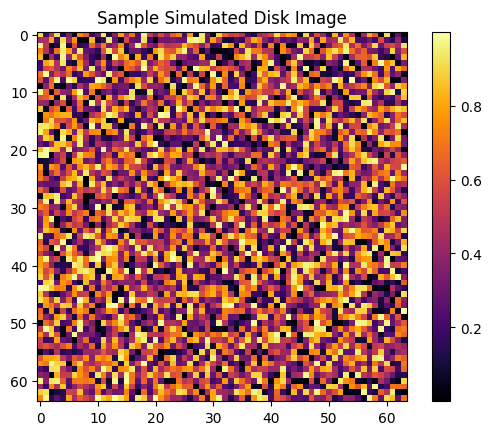

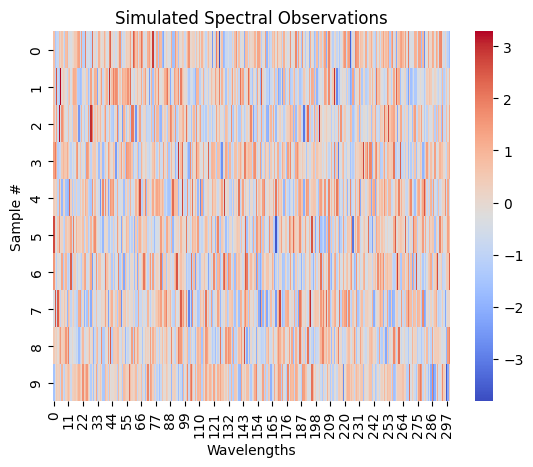

In [ ]:
# Step 2: Sample Data Loading (placeholder)
sample_disk_data = np.random.rand(64, 64)
plt.imshow(sample_disk_data, cmap='inferno')
plt.title("Sample Simulated Disk Image")
plt.colorbar()
plt.show()

spectra = np.random.normal(size=(100, 300))
sns.heatmap(spectra[:10], cmap='coolwarm')
plt.title("Simulated Spectral Observations")
plt.xlabel("Wavelengths")
plt.ylabel("Sample #")
plt.show()

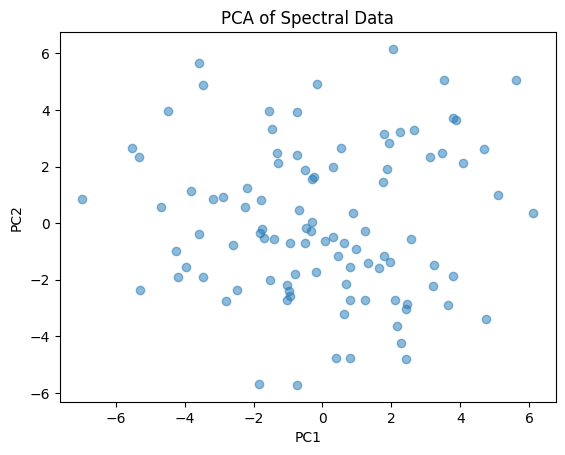

In [ ]:
# Step 3: Preprocessing
scaler = StandardScaler()
spectra_scaled = scaler.fit_transform(spectra)

pca = PCA(n_components=2)
spectra_pca = pca.fit_transform(spectra_scaled)

plt.scatter(spectra_pca[:, 0], spectra_pca[:, 1], alpha=0.5)
plt.title("PCA of Spectral Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# Step 4: Baseline CNN Model
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 31 * 31, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 31 * 31)
        x = self.fc1(x)
        return x

model = SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=15376, out_features=2, bias=True)
)


In [ ]:
# Step 5: Vision Transformer Model Loading
!pip install timm
import timm
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
print("ViT model loaded for fine-tuning.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViT model loaded for fine-tuning.


In [ ]:
# Step 6: Spectral Transformer (Conceptual)
from transformers import BertModel, BertConfig
config = BertConfig(vocab_size=30522, hidden_size=256, num_attention_heads=4, num_hidden_layers=4)
spectral_transformer = BertModel(config)
print("Spectral Transformer model instantiated.")

Spectral Transformer model instantiated.


In [ ]:
# Step 7: Evaluation using F1 Score & RMSE
from sklearn.metrics import f1_score, mean_squared_error
import numpy as np

y_true = np.random.randint(0, 2, 100)
y_pred = np.random.randint(0, 2, 100)

f1 = f1_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("F1 Score:", f1)
print("RMSE:", rmse)

F1 Score: 0.5420560747663551
RMSE: 0.7
